In [2]:
import os
import numpy as np
import pandas as pd
from time import time
from utils import custom_preprocessing, dependencies

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

data_dir = "/home/stavros/DATA/AirbnbReviews"
#data_dir = "D:/"

### Assign location to reviews

and keep only Santorini, Mykonos and Rhodes

In [2]:
area = "south_aegean"
area_dir = os.path.join(data_dir, area)

listings = pd.read_csv(os.path.join(area_dir, "listings.csv.gz"))
reviews = pd.read_csv(os.path.join(area_dir, "reviews.csv.gz"))
print(reviews.shape)
print(listings.shape)

clean_reviews = reviews[pd.notnull(reviews.comments)]
print(reviews.shape)

/home/stavros/PythonEvironments/neuralcoref-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(285025, 6)
(22897, 106)
(285025, 6)


In [3]:
location_counts = listings.neighbourhood_cleansed.value_counts()
santorini_id, mykonos_id, rhodes_id = location_counts.keys()[:3]

print(santorini_id, location_counts[0])
print(mykonos_id, location_counts[1])
print(rhodes_id, location_counts[2])

location_dict = {"Santorini": santorini_id, "Mykonos": mykonos_id, "Rhodes": rhodes_id}

Θήρας (Santorini) 3885
Μυκόνου (Μykonos) 3197
Ρόδου (Rhodes) 2951


In [6]:
location2ids = {k: set(listings[listings.neighbourhood_cleansed == ids]["id"]) for k, ids in location_dict.items()}

In [13]:
def review_location(listing_id):
    for loc, ids in location2ids.items():
        if listing_id in ids:
            return loc
    return None
            
# Identify the listing location for each review (Santorini, Mykonos, Rhodes or None for the rest)
clean_reviews["location"] = clean_reviews["listing_id"].map(review_location)
print(clean_reviews.shape)
# Keep only reviews in Santorini, Mykonos and Rhodes
clean_reviews = clean_reviews[pd.notnull(clean_reviews["location"])]
print(clean_reviews.shape)

(284936, 7)
(166698, 7)


/home/stavros/PythonEvironments/neuralcoref-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
for loc in ["Santorini", "Mykonos", "Rhodes"]:
    n = (clean_reviews["location"] == loc).sum()
    print("Number of reviews in {}: {}".format(loc, n))

Number of reviews in Santorini: 100266
Number of reviews in Mykonos: 40866
Number of reviews in Rhodes: 25566


In [17]:
clean_reviews.to_pickle(os.path.join(area_dir, "reviews_with_location.pkl"))

### Explore pre-processed data

Load preprocessed data for locations of interest

In [3]:
area = "south_aegean"
area_dir = os.path.join(data_dir, area)

island_samples = {"Santorini": 100266, "Mykonos": 40866, "Rhodes": 25566}

island_reviews = {k: pd.read_pickle(os.path.join(area_dir, "reviews_with_aspects_{}_{}samples.pkl".format(k, n)))
                  for k, n in island_samples.items()}

for k, r in island_reviews.items():
    print("{}: {}".format(k, r.shape))

Santorini: (100266, 9)
Mykonos: (40866, 9)
Rhodes: (25566, 9)


How many reviews have no aspects

In [4]:
for k, r in island_reviews.items():
    print("{}: {}".format(k, pd.isnull(r["aspects"]).sum() * 100.0 / len(r)))
    
# Clean reviews
for k, r in island_reviews.items():
    island_reviews[k] = r[pd.notnull(r["aspects"])]

Santorini: 16.34751560848144
Mykonos: 16.926050995937942
Rhodes: 28.737385590237032


In [5]:
from utils import aspect_tools

island_aspects = {k: aspect_tools.collect_aspects(r) for k, r in island_reviews.items()}

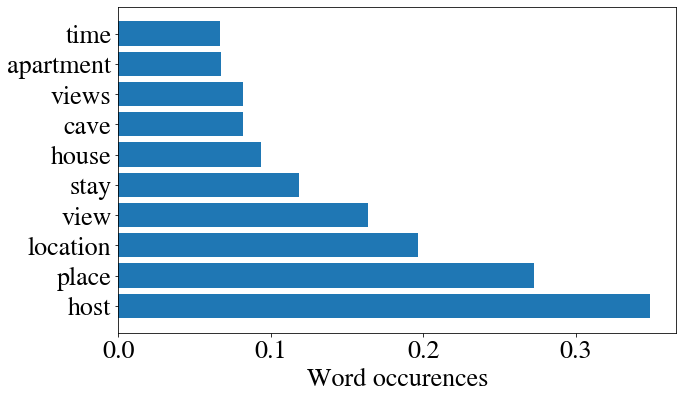

In [11]:
island = "Santorini"
aspect_tools.word_barchart(plt, island_aspects[island], n_reviews=len(island_reviews[island]))

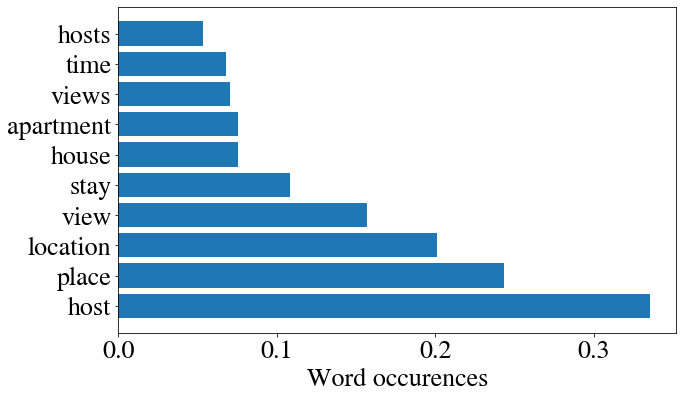

In [7]:
island = "Mykonos"
aspect_tools.word_barchart(plt, island_aspects[island], n_reviews=len(island_reviews[island]))